In [1]:
import pandas as pd

C:\Users\jacob\AppData\Local\Temp\ipykernel_272004\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [18]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('274b819c-5d69-4539-a4db-f2950794138c.csv')

In [3]:
df.head()

,_id,date,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac
0,1,2021-08-10T00:00:00,22,3,0,23,4,11
1,2,2021-08-11T00:00:00,37,5,2,34,7,8
2,3,2021-08-12T00:00:00,45,5,2,44,7,9
3,4,2021-08-13T00:00:00,52,5,3,65,6,8
4,5,2021-08-14T00:00:00,53,4,1,67,6,11


In [4]:
len(df)

318

In [5]:
df.describe()

,_id,icu_unvac,icu_partial_vac,icu_full_vac,hospitalnonicu_unvac,hospitalnonicu_partial_vac,hospitalnonicu_full_vac
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,159.500000,70.210692,7.264151,61.223270,196.666667,39.899371,496.000000
std,91.942917,48.020989,4.580101,59.469716,167.817355,44.409436,545.809814
min,1.000000,6.000000,1.000000,0.000000,23.000000,4.000000,8.000000
25%,80.250000,31.000000,4.000000,15.000000,99.000000,11.000000,42.750000
50%,159.500000,64.000000,6.000000,47.500000,135.500000,22.000000,365.500000
75%,238.750000,88.750000,9.000000,79.000000,221.500000,49.000000,810.500000
max,318.000000,232.000000,28.000000,281.000000,784.000000,219.000000,2119.000000


In [6]:
Data look pretty clean!

Run means another way.

SyntaxError: invalid syntax (1714509219.py, line 1)

In [7]:
df[['icu_unvac','icu_partial_vac','icu_full_vac','hospitalnonicu_unvac','hospitalnonicu_partial_vac','hospitalnonicu_full_vac']].mean()

icu_unvac                      70.210692
icu_partial_vac                 7.264151
icu_full_vac                   61.223270
hospitalnonicu_unvac          196.666667
hospitalnonicu_partial_vac     39.899371
hospitalnonicu_full_vac       496.000000
dtype: float64

Take some basic percentages of icu vs hospitalnonicu for each category (i.e., unvac, partial vac, full vac).

In [8]:
print('Percentage of unvaccinated people who are hospitalized and end up in ICU:        ',df['icu_unvac'].mean()/df['hospitalnonicu_unvac'].mean()*100)
print('Percentage of partially vaccinated people who are hospitalized and end up in ICU:',df['icu_partial_vac'].mean()/df['hospitalnonicu_partial_vac'].mean()*100)
print('Percentage of fully vaccinated people who are hospitalized and end up in ICU:    ',df['icu_full_vac'].mean()/df['hospitalnonicu_full_vac'].mean()*100)

Percentage of unvaccinated people who are hospitalized and end up in ICU:         35.70035177486409
Percentage of partially vaccinated people who are hospitalized and end up in ICU: 18.206179066834807
Percentage of fully vaccinated people who are hospitalized and end up in ICU:     12.343401298437817


In [9]:
print('test:',df['icu_unvac'].mean()/df['hospitalnonicu_unvac'].mean()*100)

test: 35.70035177486409


In [10]:
icu_values = (df['icu_unvac'].mean(),df['icu_partial_vac'].mean(),df['icu_full_vac'].mean())
hospital_nonicu_values = (df['hospitalnonicu_unvac'].mean(),df['hospitalnonicu_partial_vac'].mean(),df['hospitalnonicu_full_vac'].mean())

In [11]:
icu_values

(70.21069182389937, 7.264150943396227, 61.223270440251575)

In [12]:
hospital_nonicu_values

(196.66666666666666, 39.899371069182386, 496.0)

Visualize potentially misleading raw values comparing unvaccinated vs vaccinated folks #1

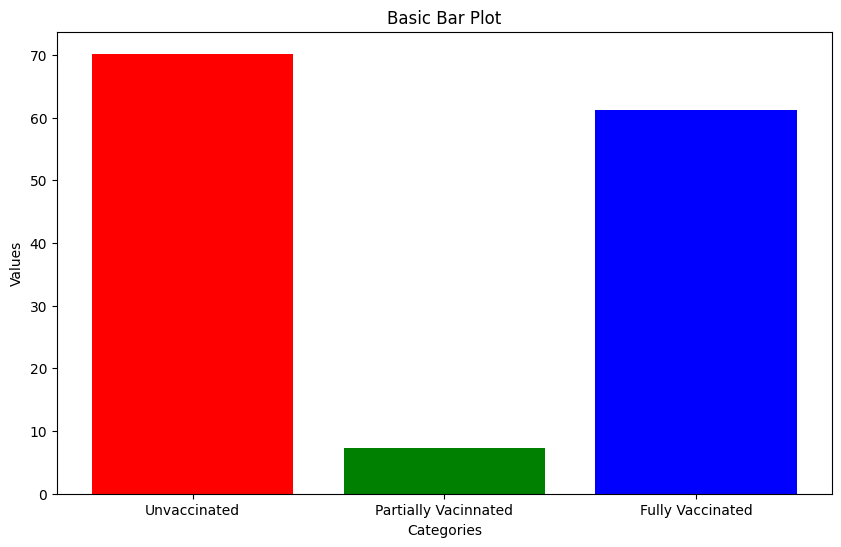

In [19]:
categories = ['Unvaccinated', 'Partially Vacinnated', 'Fully Vaccinated']

plt.figure(figsize=(10, 6))
plt.bar(categories, icu_values, color=['red', 'green', 'blue'])
plt.title('Basic Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

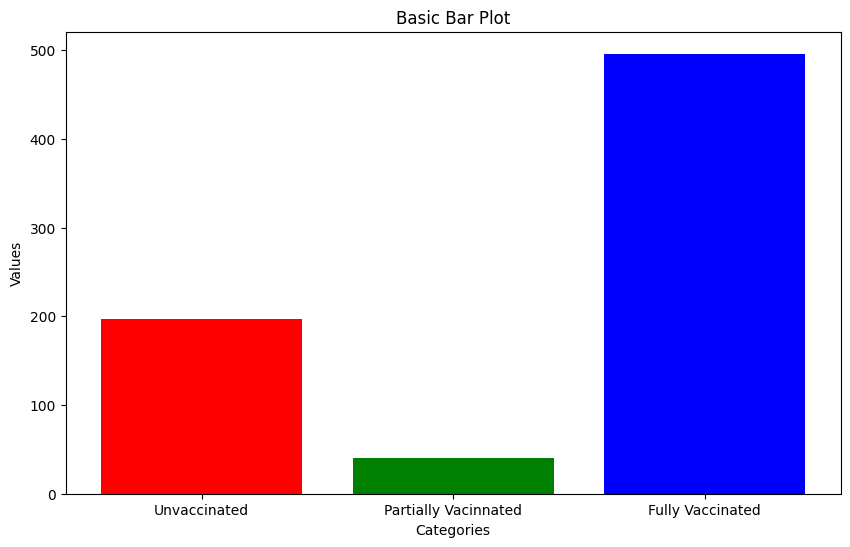

In [20]:
categories = ['Unvaccinated', 'Partially Vacinnated', 'Fully Vaccinated']

plt.figure(figsize=(10, 6))
plt.bar(categories, hospital_nonicu_values, color=['red', 'green', 'blue'])
plt.title('Basic Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

Without ratios, we might assume that unvaccinated folks are better off (because we haven't accounted for count of unvaccinated and fully vaccinated folks included here). So, let's visualize which percentage in each category ends up in ICU (rather than non-ICU).

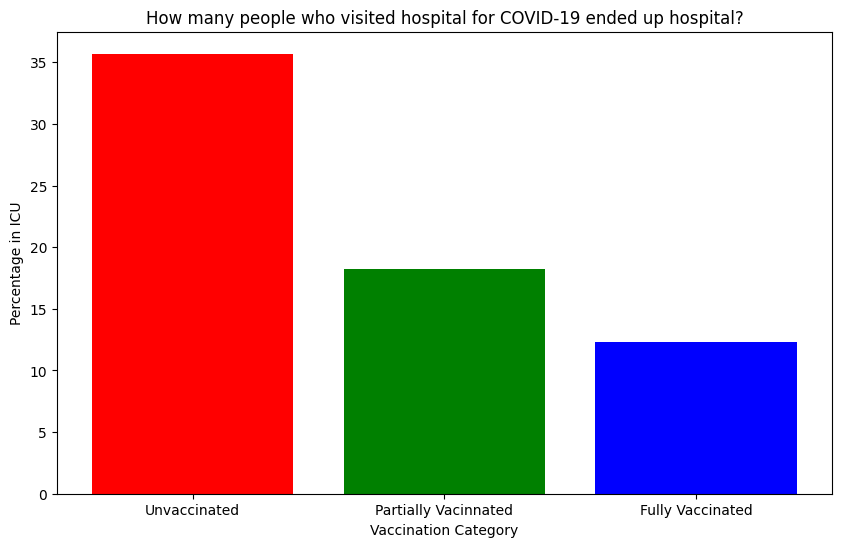

In [25]:
percentages = (df['icu_unvac'].mean()/df['hospitalnonicu_unvac'].mean()*100,df['icu_partial_vac'].mean()/df['hospitalnonicu_partial_vac'].mean()*100,df['icu_full_vac'].mean()/df['hospitalnonicu_full_vac'].mean()*100)

categories = ['Unvaccinated', 'Partially Vacinnated', 'Fully Vaccinated']

plt.figure(figsize=(10, 6))
plt.bar(categories, percentages, color=['red', 'green', 'blue'])
plt.title('How many people who visited hospital for COVID-19 ended up hospital?')
plt.xlabel('Vaccination Category')
plt.ylabel('Percentage in ICU')
plt.show()

It's apparent that unvaccinated and partially vaccinated folks ended up in hospital more than fully vaccinated folks (statistical significance not tested).